<a href="https://colab.research.google.com/github/hylabrook/ML/blob/master/covid01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

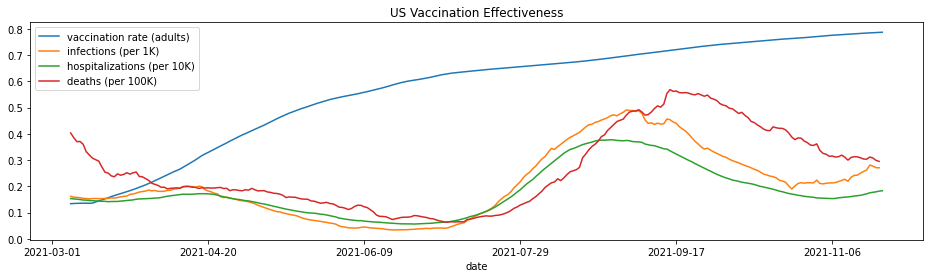

In [23]:
import pandas as pd

# Load data for the US
df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/US.csv')

# Keep data for 2021 only
df = df[df.date >= '2021-03-01'].set_index('date')

# Compute population counts
total_population = df.population.iloc[0]
adult_population = total_population - df.population_age_00_09.iloc[0] - df.population_age_10_19.iloc[0]

# Compute smoothed averages of our variables
X = pd.DataFrame(index=df.index)
X['vaccination rate (adults)'] = df.cumulative_persons_fully_vaccinated.rolling(7).mean() / adult_population
X['infections (per 1K)'] = df.new_confirmed.rolling(7).mean() / total_population * 1_000
X['hospitalizations (per 10K)'] = df.new_hospitalized_patients.rolling(7).mean() / total_population * 10_000
X['deaths (per 100K)'] = df.new_deceased.rolling(7).mean() / total_population * 100_000

X.plot(figsize=(16, 4), title='US Vaccination Effectiveness');

In [24]:
df.head(5)

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,new_confirmed,new_deceased,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_fully_vaccinated_pfizer,cumulative_persons_fully_vaccinated_pfizer,new_vaccine_doses_administered_pfizer,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,...,search_trends_tonsillitis,search_trends_toothache,search_trends_tremor,search_trends_trichoptilosis,search_trends_tumor,search_trends_type_2_diabetes,search_trends_unconsciousness,search_trends_underweight,search_trends_upper_respiratory_tract_infection,search_trends_urethritis,search_trends_urinary_incontinence,search_trends_urinary_tract_infection,search_trends_urinary_urgency,search_trends_uterine_contraction,search_trends_vaginal_bleeding,search_trends_vaginal_discharge,search_trends_vaginitis,search_trends_varicose_veins,search_trends_vasculitis,search_trends_ventricular_fibrillation,search_trends_ventricular_tachycardia,search_trends_vertigo,search_trends_viral_pneumonia,search_trends_visual_acuity,search_trends_vomiting,search_trends_wart,search_trends_water_retention,search_trends_weakness,search_trends_weight_gain,search_trends_wheeze,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-01,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,48164.0,1182.0,1616239.0,27898205.0,496708.0,348863514.0,4584.0,1937849.0,43721.0,49.0,44956.0,11362.0,0.0,4252.0,3171.0,1190752.0,57339775.0,772049.0,30247891.0,2019393.0,89500415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.57,0.92,0.62,0.13,1.18,4.28,0.23,0.83,0.11,0.15,1.39,3.82,0.08,0.81,0.50,2.31,0.66,0.49,0.17,0.09,0.23,1.15,0.04,0.25,2.54,1.23,0.29,0.44,3.58,0.26,2.47,0.42,0.17,1.411111,-5.605556,11.244444,0.0000,NaN,-6.477778,56.052253
2021-03-02,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,52313.0,1280.0,1742864.0,27950518.0,497988.0,350606378.0,5453.0,1943302.0,42650.0,128.0,45084.0,11040.0,5.0,4257.0,3169.0,1473325.0,58813100.0,941608.0,31189499.0,2459623.0,91960038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.58,0.93,0.62,0.14,1.30,4.40,0.23,0.87,0.10,0.15,1.34,3.85,0.08,0.81,0.49,2.37,0.68,0.49,0.17,0.10,0.24,1.16,0.04,0.26,2.45,1.24,0.29,0.45,3.60,0.26,2.56,0.44,0.17,6.188889,-3.033333,20.222222,0.0000,NaN,-7.033333,38.867950
2021-03-03,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,60865.0,1493.0,1557934.0,28011383.0,499481.0,352164312.0,5405.0,1948707.0,42159.0,130.0,45214.0,10745.0,3.0,4260.0,3094.0,1749289.0,60562389.0,1110660.0,32300159.0,2901742.0,94861780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.57,0.92,0.66,0.14,1.22,4.33,0.23,0.90,0.11,0.14,1.34,3.78,0.08,0.81,0.47,2.35,0.67,0.50,0.16,0.10,0.24,1.14,0.04,0.25,2.41,1.24,0.29,0.45,3.58,0.25,2.53,0.42,0.18,8.444444,-3.005556,21.072222,0.0254,NaN,-5.222222,38.649131
2021-03-04,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,61634.0,1482.0,1435

In [25]:
total_death=df.new_deceased.sum()

In [26]:
total_death

232775.0

In [3]:
import pandas as pd
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/latest/aggregated.csv",
    keep_default_na=False,
    na_values=[""],
)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (170,171,172,173,174,175,176,177,178,179,699,702,704,706,707) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.shape

(22315, 737)

In [32]:
data.head(5)

,location_key,date,new_confirmed_male,new_confirmed_female,cumulative_confirmed_male,cumulative_confirmed_female,new_deceased_male,new_deceased_female,cumulative_deceased_male,cumulative_deceased_female,new_recovered_male,new_recovered_female,cumulative_recovered_male,cumulative_recovered_female,new_tested_male,new_tested_female,cumulative_tested_male,cumulative_tested_female,new_hospitalized_patients_male,new_hospitalized_patients_female,cumulative_hospitalized_patients_male,cumulative_hospitalized_patients_female,new_intensive_care_patients_male,new_intensive_care_patients_female,cumulative_intensive_care_patients_male,cumulative_intensive_care_patients_female,new_ventilator_patients_male,new_ventilator_patients_female,cumulative_ventilator_patients_male,cumulative_ventilator_patients_female,new_confirmed_age_0,new_confirmed_age_1,new_confirmed_age_2,new_confirmed_age_3,new_confirmed_age_4,new_confirmed_age_5,new_confirmed_age_6,new_confirmed_age_7,new_confirmed_age_8,new_confirmed_age_9,...,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,gdp_usd,gdp_per_capita_usd,human_capital_index,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
0,AU,2021-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ChIJ38WHZwf9KysRUhNblaFnglM,Q408,country/AUS,AU,Australia,NaN,NaN,NaN,NaN,NaN,NaN,AU,AUS,0,1.392681e+12,54907.0,0.803,0.0,0.0,0.0,0.0,199650.0,1948.0,111996.0,46718888.0,0.0,14.0,-12.0,-39.0,-9.0,4.0,NaN,NaN,564.0,NaN,NaN,76.0,NaN,NaN,39.0
1,AU_ACT,2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ChIJSxCboN9MFmsRA3huXDhEWOc,Q3258,NaN,AU,Australia,ACT,Australian Capital Territory,NaN,NaN,NaN,NaN,AU,AUS,1,NaN,NaN,NaN,14.0,0.0,4.0,3499.0,2053.0,14.0,1855.0,614305.0,1.0,11.0,-16.0,-40.0,-21.0,8.0,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN,1.0
2,AU_NSW,2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ChIJDUte93TLDWsRLZ_EIhGvgBc,Q3224,NaN,AU,Australia,NSW,New South Wales,NaN,NaN,NaN,NaN,AU,AUS,1,NaN,NaN,NaN,180.0,1.0,0.0,45405.0,79997.0,621.0,3445.0,21285374.0,-8.0,10.0,-13.0,-41.0,-18.0,5.0,NaN,NaN,202.0,NaN,NaN,30.0,NaN,NaN,15.0
3,AU_NT,2021-11-22,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ChIJDxnz5sJyUSsRdScAAAAAAAA,Q3235,NaN,AU,Australia,NT,Northern Territory,NaN,NaN,NaN,NaN,AU,AUS,1,NaN,NaN,NaN,0.0,0.0,-1.0,1251.0,265.0,0.0,227.0,485614.0,12.0,25.0,11.0,-39.0,9.0,1.0,NaN,NaN,37.0,NaN,NaN,0.0,NaN,NaN,0.0
4,AU_QLD,2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ChIJ_dxieiTf1GsRmb4SdiLQ8vU,Q36074,NaN,AU,Australia,QLD,Queensland,NaN,NaN,NaN,NaN,AU,AUS,1,NaN,NaN,NaN,0.0,0.0,11.0,6551.0,2112.0,7.0,2097.0,4846496.0,7.0,14.0,2.0,-36.0,6.0,0.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,0.0


In [33]:
data.columns

Index(['location_key', 'date', 'new_confirmed_male', 'new_confirmed_female',
       'cumulative_confirmed_male', 'cumulative_confirmed_female',
       'new_deceased_male', 'new_deceased_female', 'cumulative_deceased_male',
       'cumulative_deceased_female',
       ...
       'mobility_residential', 'new_hospitalized_patients',
       'cumulative_hospitalized_patients', 'current_hospitalized_patients',
       'new_intensive_care_patients', 'cumulative_intensive_care_patients',
       'current_intensive_care_patients', 'new_ventilator_patients',
       'cumulative_ventilator_patients', 'current_ventilator_patients'],
      dtype='object', length=737)

In [34]:
data.info

<bound method DataFrame.info of       location_key  ... current_ventilator_patients
0               AU  ...                        39.0
1           AU_ACT  ...                         1.0
2           AU_NSW  ...                        15.0
3            AU_NT  ...                         0.0
4           AU_QLD  ...                         0.0
...            ...  ...                         ...
22310        SD_SI  ...                         NaN
22311        SL_NW  ...                         NaN
22312     SL_NW_KA  ...                         NaN
22313      SL_N_FB  ...                         NaN
22314         VE_F  ...                         NaN

[22315 rows x 737 columns]>

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22315 entries, 0 to 22314
Columns: 737 entries, location_key to current_ventilator_patients
dtypes: float64(711), int64(1), object(25)
memory usage: 125.5+ MB


In [36]:
data['location_key'].value_counts()

CZ_20_203       1
CO_15_15537     1
US_PR_72153     1
RU_SE           1
PE_ANC_0306     1
               ..
ES_MD_28008     1
BE_VAN          1
BR_BA_291030    1
CO_68_68217     1
BR_PB_251450    1
Name: location_key, Length: 22315, dtype: int64